# Indicators of Heavy Traffic on I-94
In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [54]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

i_94.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [55]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [56]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

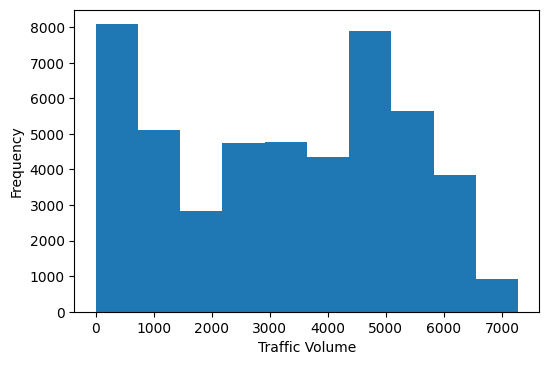

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [58]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Upon analysis of the distribution of `traffic_volume`, we found the following:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.


- About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)


- Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [59]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

Now we're going to compare the traffic volume at night and during day.

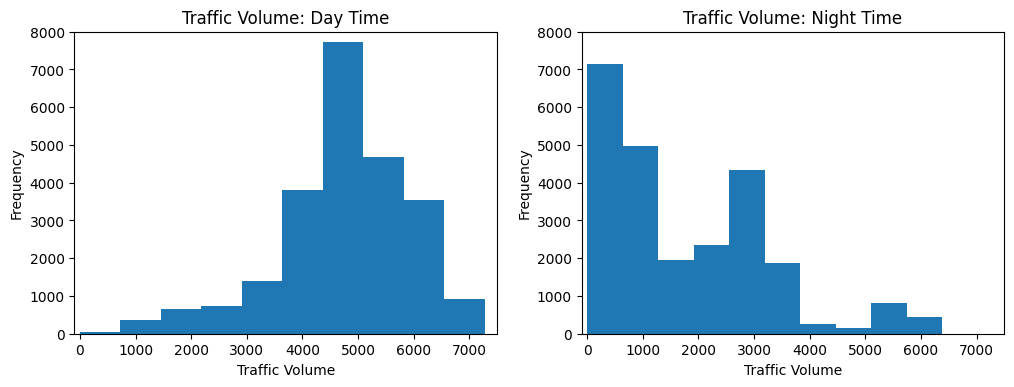

In [60]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Day Time')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Night Time')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

In [61]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [62]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime traffic volume distribution is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

On comparison of the daytime and nighttime traffic volume distributions, it is clear that the traffic at night is generally light. 

Our goal is to find indicators of **heavy traffic**, so we'll only focus on the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [63]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

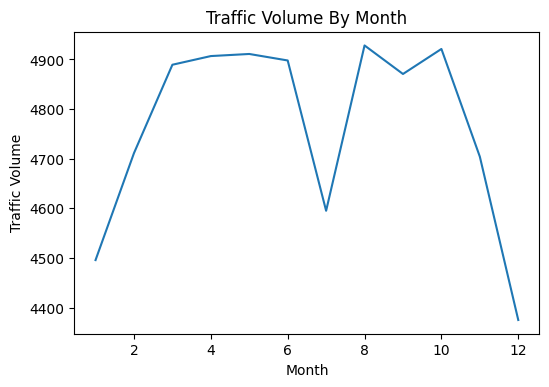

In [64]:
by_month['traffic_volume'].plot.line()
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume By Month')
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. 

Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

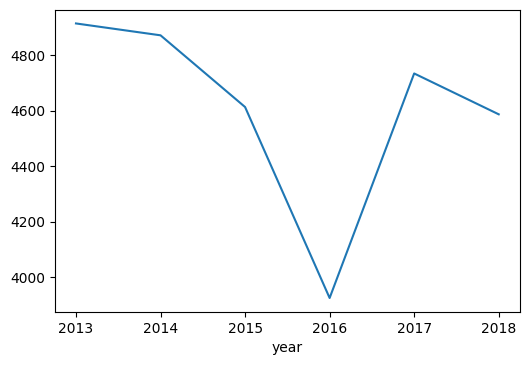

In [65]:
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
by_july = july.groupby('year').mean()
by_july['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators (II)

We'll now continue with building line plots for another time unit: day of the week.

In [66]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

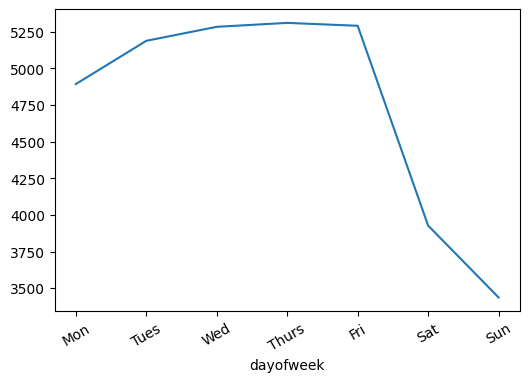

In [67]:
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation=30)
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Traffic is lighter on weekends, with values below 4,000 cars.

## Time Indicators (III)
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

In [68]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


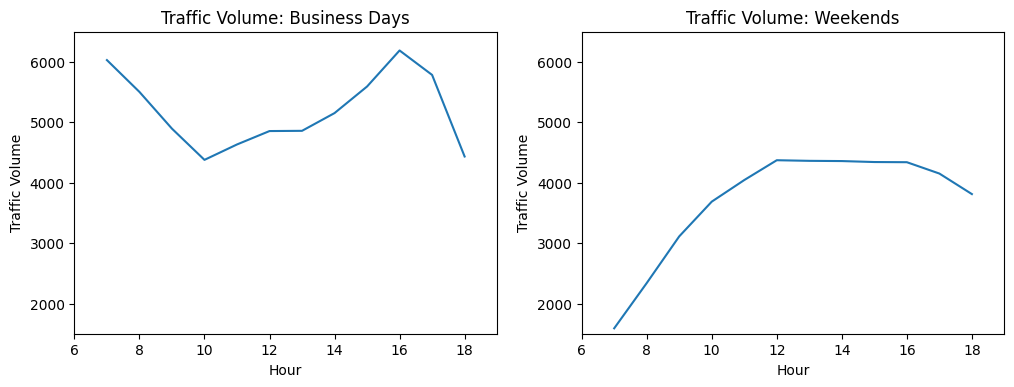

In [69]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume: Business Days')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim(6, 19)
plt.ylim(1500, 6500)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume: Weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim(6, 19)
plt.ylim(1500, 6500)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. 

As expected on business days, the rush hours are around 7 AM (when most people leave for work) and 4 PM (when most people leave work for their homes), with  traffic volumes of over 6000 on the average.

On weekends, the rush hours are between 12 PM and 4 PM, with traffic volumes of about 4300 on the average.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 AM and around 4 PM.
- On weekends, the rush hours are between 12 PM and 4 PM.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [70]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  year                 23877 non-null  int64         
 11  dayofweek            23877 non-null  int64         
 12  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

A few of these columns are numerical(`temp`, `rain_1h`, `snow_1h`, `clouds_all`), so let's start by looking up their correlation values with `traffic_volume`.

In [71]:
day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

`Temp` shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `louds_all`) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

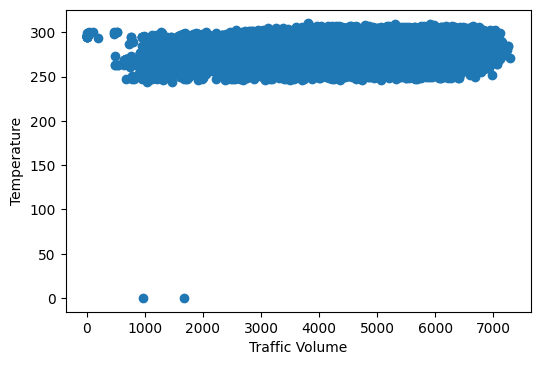

In [72]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.show()

From the scatter plot of `traffic_volume` vs. `temp` and the correlation values of the numerical weather columns, **None of the weather columns seem like reliable indicators for heavy traffic.**

## Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

In [73]:
day['weather_main'].value_counts()

Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64

In [74]:
day['weather_description'].value_counts()

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

Next, We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [75]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

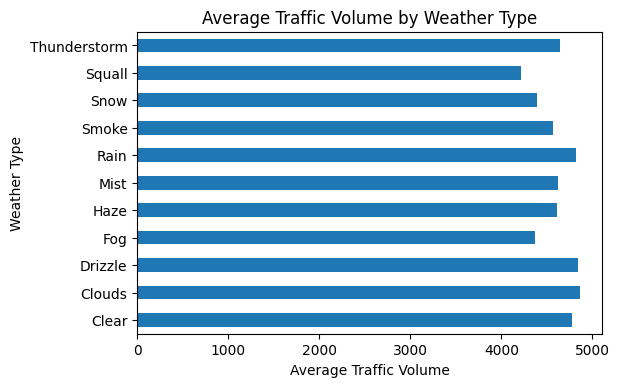

In [77]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Average Traffic Volume by Weather Type')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Type')
plt.show()

From the bar plot above, no weather type exceeds an average traffic volume of 5,000 cars. As a result, we cannot conclusively categorize any weather type as a heavy traffic indicator.

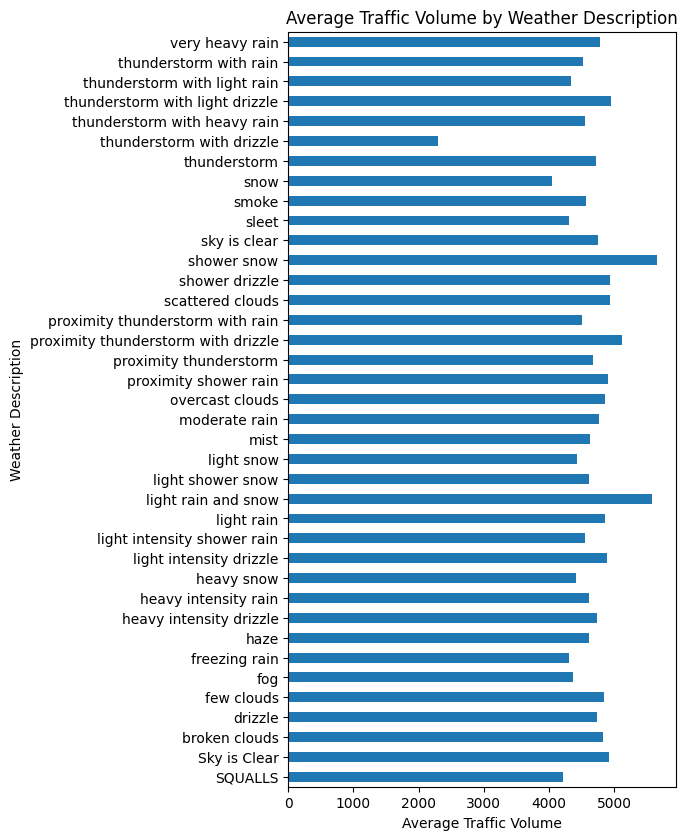

In [79]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.title('Average Traffic Volume by Weather Description')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

From the bar plot above, it looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Proximity thunderstorm with drizzle
- Light rain and snow

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people drive when the weather is bad instead of riding a bike or walking.

## Conclusions

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

1. **Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 AM and 4 PM.

2. **Weather indicators**
- Shower snow
- Proximity thunderstorm with drizzle
- Light rain and snow